<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

In [9]:
import numpy as np

def convolution2D(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding needed for valid convolution
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Initialize the output image
    output = np.zeros((img_height, img_width))

    # Perform convolution
    for x in range(pad_height, img_height - pad_height):
        for y in range(pad_width, img_width - pad_width):
            # Apply the kernel
            for k1 in range(kernel_height):
                for k2 in range(kernel_width):
                    output[x, y] += kernel[k1, k2] * image[x - pad_height + k1, y - pad_width + k2]

    return output

# Example usage:
# Define your input image and kernel
image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

result = convolution2D(image, kernel)
print(result)

[[ 0.  0.  0.  0.]
 [ 0. -8. -8.  0.]
 [ 0. -8. -8.  0.]
 [ 0.  0.  0.  0.]]


**Access the files contained on the drive and import some of the libraries that are needed**

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

### **Convulation without library**

**Convulation Function that make, have parameter:**
1. Input image
2. The kernel is a matrix for filtering images
3. Stride value / shift amount for each convolution
4. The pad value to be added to the image

In [12]:
def convolution2D(image, kernel, stride, padding):
  # Load the image
  img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Image sharpen kernel
  kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

  # Apply the convolution
  result = convolution(img_gray, kernel_sharpen, 1, 2)

### **Sharpen**

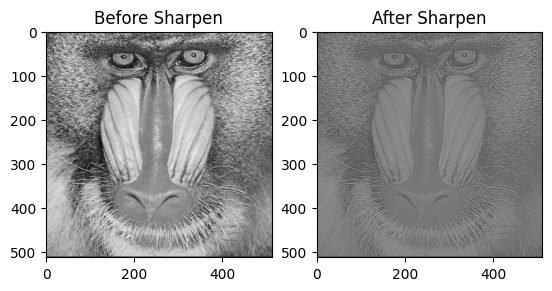

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convolution2D(image, kernel, stride, padding):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (img_height - kernel_height + 2 * padding) // stride + 1
    output_width = (img_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width))

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for y in range(0, img_height - kernel_height + 1, stride):
        for x in range(0, img_width - kernel_width + 1, stride):
            output_y = y // stride
            output_x = x // stride
            output[output_y, output_x] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

# Read Image
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Choosen Kernel
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

stride = 1
padding = 1

# Display Image Before Sharpen
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Before Sharpen')

# Sharpen
result = convolution2D(image, kernel_sharpen, stride, padding)

# Display Image After Sharpen
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('After Sharpen')

plt.show()

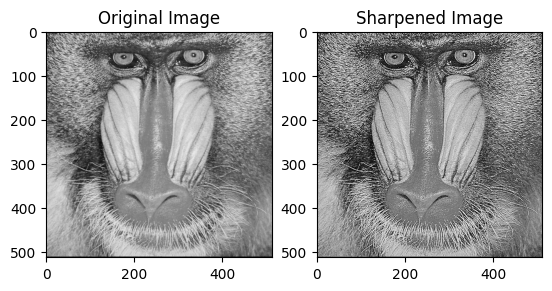

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Define the sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the result of sharpening
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()

### **Emboss**

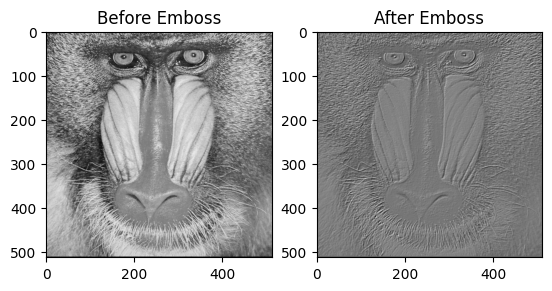

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convolution2D(image, kernel, stride, padding):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (img_height - kernel_height + 2 * padding) // stride + 1
    output_width = (img_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width))

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for y in range(0, img_height - kernel_height + 1, stride):
        for x in range(0, img_width - kernel_width + 1, stride):
            output_y = y // stride
            output_x = x // stride
            output[output_y, output_x] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

# Read Image
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Choosen Kernel
kernel_sharpen = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

stride = 1
padding = 1

# Display Image Before
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Before Emboss')

# Sharpen
result = convolution2D(image, kernel_sharpen, stride, padding)

# Display Image After
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('After Emboss')

plt.show()

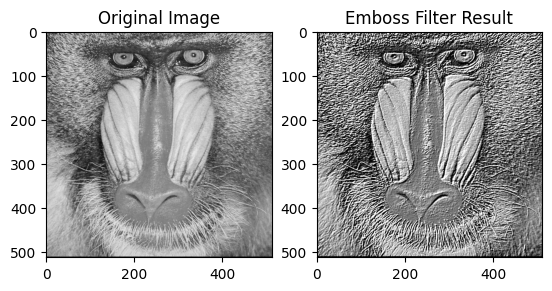

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Define the emboss kernel
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# Apply the emboss kernel to the image
emboss_result = cv2.filter2D(image, -1, emboss_kernel)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the result of the emboss filter
plt.subplot(1, 2, 2)
plt.imshow(emboss_result, cmap='gray')
plt.title('Emboss Filter Result')

plt.show()

### **Left Sobel Edge Detection**

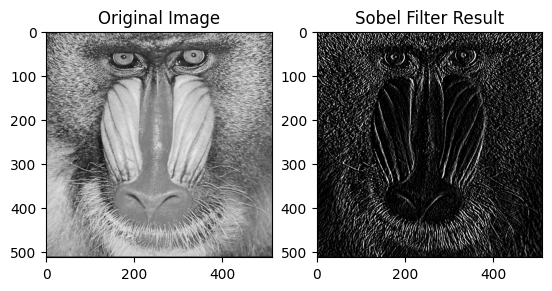

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Define the Sobel filter kernel
sobel_kernel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

# Apply the Sobel filter to the image
sobel_result = cv2.filter2D(image, -1, sobel_kernel)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the result of Sobel filtering
plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filter Result')

plt.show()

### **Canny Edge Detection**

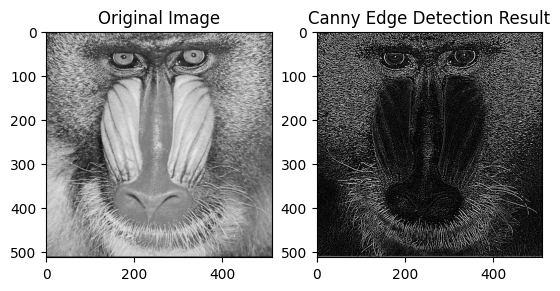

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Define the edge detection
canny_like_kernel = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

# Apply to the image
canny_like_result = cv2.filter2D(image, -1, canny_like_kernel)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the result of the edge detection
plt.subplot(1, 2, 2)
plt.imshow(canny_like_result, cmap='gray')
plt.title('Canny Edge Detection Result')

plt.show()

### **21x21 Gaussian Blur**

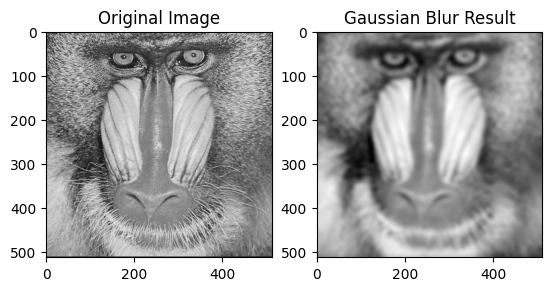

In [41]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff', cv2.IMREAD_GRAYSCALE)

# Define the kernel size
kernel_size = 21

# Calculate sigma based on the kernel size
sigma = math.sqrt(kernel_size)

# Create a 1D Gaussian kernel
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)

# Create a 2D Gaussian kernel by multiplying the 1D kernel with its transpose
gauss_kernel = np.outer(gaussian_kernel, gaussian_kernel)

# Normalize the kernel to ensure the sum of weights is 1
gauss_kernel = gauss_kernel / gauss_kernel.sum()

# Apply the Gaussian blur to the image
gaussian_blur_result = cv2.filter2D(image, -1, gauss_kernel)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the result of Gaussian blur
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur_result, cmap='gray')
plt.title('Gaussian Blur Result')

plt.show()